# Exoplanets Confirmed and Candidates

## Introduction

In this project, we conducted an analysis of a dataset containing celestial body characteristics to predict planet statuses using a Random Forest classifier. Starting with exploratory data analysis, we visualized distributions and identified outliers, choosing to clean the data using Z-score methodology for outlier removal. The cleaned dataset was then used to train and evaluate the Random Forest model, achieving reasonable accuracy in classifying planets as either "Candidate" or "Confirmed." Further analysis included examining correlations between numerical features. This work lays the groundwork for predictive modeling and insights into celestial data, with opportunities for future model optimization and exploration.

## EDA

In [1]:
import pandas as pd

# Load the file
file_path = 'exoplanet_confirm_and_candidates.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,radius_error_max,orbital_period,orbital_period_error_min,orbital_period_error_max,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,eccentricity,eccentricity_error_min,eccentricity_error_max,inclination,inclination_error_min,inclination_error_max,angular_distance,discovered,updated,omega,omega_error_min,omega_error_max,tperi,tperi_error_min,tperi_error_max,tconj,tconj_error_min,tconj_error_max,tzero_tr,tzero_tr_error_min,tzero_tr_error_max,tzero_tr_sec,tzero_tr_sec_error_min,...,geometric_albedo,geometric_albedo_error_min,geometric_albedo_error_max,log_g,publication,detection_type,mass_detection_type,radius_detection_type,alternate_names,molecules,star_name,ra,dec,mag_v,mag_i,mag_j,mag_h,mag_k,star_distance,star_distance_error_min,star_distance_error_max,star_metallicity,star_metallicity_error_min,star_metallicity_error_max,star_mass,star_mass_error_min,star_mass_error_max,star_radius,star_radius_error_min,star_radius_error_max,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,NaN,NaN,NaN,19.40,1.50,1.50,NaN,NaN,NaN,326.03,0.32,0.32,1.29,0.05,0.05,0.231,0.005,0.005,NaN,NaN,NaN,0.011664,2008.0,2015-08-21,94.80,1.50,1.50,2452899.60,1.60,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,NaN,NaN,NaN,NaN,11 Com,185.179167,17.792778,4.74,NaN,NaN,NaN,NaN,110.6,10.5,10.5,-0.350,0.09,0.09,2.7000,0.300,0.300,19.00,2.00,2.00,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.00,3.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,730000.00,365000.00,365000.00,243.00,55.00,55.00,NaN,NaN,NaN,NaN,NaN,NaN,1.675862,2007.0,2018-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Imaging,NaN,NaN,Oph 1622-2405 b,NaN,11 Oph,245.604167,-24.087222,NaN,NaN,NaN,NaN,14.03,145.0,20.0,20.0,NaN,NaN,NaN,0.0162,0.005,0.005,NaN,NaN,NaN,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
2,11 UMi b,Confirmed,NaN,NaN,NaN,10.50,2.47,2.47,NaN,NaN,NaN,516.22,3.25,3.25,1.54,0.07,0.07,0.080,0.030,0.030,NaN,NaN,NaN,0.012887,2009.0,2009-08-12,117.63,21.06,21.06,2452861.05,2.06,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,NaN,NaN,NaN,NaN,11 UMi,229.275000,71.823889,5.02,NaN,NaN,NaN,NaN,119.5,6.9,6.9,0.040,0.04,0.04,1.8000,0.250,0.250,24.08,1.84,1.84,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
3,11 Uma b,Unconfirmed,3.72,0.82,0.82,NaN,NaN,NaN,NaN,NaN,NaN,651.90,7.10,7.10,1.56,0.07,0.07,0.700,0.070,0.070,NaN,NaN,NaN,0.049367,2008.0,2010-11-25,6.24,8.90,8.90,53469.30,5.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Default,NaN,NaN,NaN,NaN,11 Uma,137.095833,66.873333,5.16,NaN,NaN,NaN,NaN,31.6,2.9,2.9,-0.245,0.04,0.04,1.8100,0.195,0.195,36.30,4.20,4.20,K5III,NaN,NaN,NaN,4090.0,70.0,70.0,NaN,NaN,NaN
4,14 And b,Confirmed,NaN,NaN,NaN,5.33,0.57,0.57,NaN,NaN,NaN,185.84,0.23,0.23,0.83,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.010864,2008.0,2014-08-27,NaN,NaN,NaN,2452861.40,1.50,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,NaN,NaN,NaN,NaN,14 And,352.820833,39.236111,5.22,4.1,3.02,2.61,2.33,76.4,4.1,4.1,-0.240,NaN,NaN,2.2000,0.200,0.200,11.00,1.00,1.00,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN


## Data Cleaning

In [2]:
# Calculate the quantities of planet_status (confirmed and unconfirmed)
planet_status_counts = data['planet_status'].value_counts().reset_index()

# Rename the columns for clarity
planet_status_counts.columns = ['Planet Status', 'Quantity']

planet_status_counts

,Planet Status,Quantity
0,Confirmed,4718
1,Candidate,2489
2,Unconfirmed,175
3,Controversial,19
4,Retracted,13


In [3]:
# Define the list of selected columns
selected_columns = [
    'planet_status', 'mass', 'radius', 'orbital_period', 'eccentricity',
    'inclination', 'angular_distance', 'tperi', 'temp_measured', 'geometric_albedo',
    'detection_type', 'mass_detection_type', 'radius_detection_type', 'star_distance',
    'star_mass', 'star_radius', 'star_age'
]

# Select only the specified columns from the dataset
selected_data = data[selected_columns]

# Display the first few rows of the selected data to verify the selection
selected_data.head(), selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   planet_status          7414 non-null   object 
 1   mass                   1599 non-null   float64
 2   radius                 5910 non-null   float64
 3   orbital_period         7079 non-null   float64
 4   eccentricity           2004 non-null   float64
 5   inclination            3570 non-null   float64
 6   angular_distance       740 non-null    float64
 7   tperi                  749 non-null    float64
 8   temp_measured          51 non-null     float64
 9   geometric_albedo       13 non-null     float64
 10  detection_type         7414 non-null   object 
 11  mass_detection_type    1381 non-null   object 
 12  radius_detection_type  901 non-null    object 
 13  star_distance          4749 non-null   float64
 14  star_mass              6827 non-null   float64
 15  star

(  planet_status   mass  radius  ...  star_mass  star_radius  star_age
 0     Confirmed    NaN     NaN  ...     2.7000        19.00       NaN
 1     Confirmed  21.00     NaN  ...     0.0162          NaN     0.011
 2     Confirmed    NaN     NaN  ...     1.8000        24.08     1.560
 3   Unconfirmed   3.72     NaN  ...     1.8100        36.30       NaN
 4     Confirmed    NaN     NaN  ...     2.2000        11.00       NaN
 
 [5 rows x 17 columns],
 None)

### Detection Types

In [4]:
# Calculate the quantities of different detection_types
detection_type_counts = selected_data['detection_type'].value_counts().reset_index()

# Rename the columns for clarity
detection_type_counts.columns = ['Detection Type', 'Quantity']

detection_type_counts

,Detection Type,Quantity
0,Primary Transit,5812
1,Radial Velocity,990
2,Default,204
3,Imaging,160
4,Microlensing,150
5,Timing,51
6,TTV,28
7,Astrometry,19


### Detection Type x Planet Status

In [5]:
# Create a table of detection type by planet status quantities
detection_status_counts = selected_data.groupby(['detection_type', 'planet_status']).size().unstack(fill_value=0)

detection_status_counts

planet_status,Candidate,Confirmed,Controversial,Retracted,Unconfirmed
detection_type,,,,,
Astrometry,5,14,0,0,0
Default,16,12,2,1,173
Imaging,9,146,3,2,0
Microlensing,1,149,0,0,0
Primary Transit,2391,3415,4,2,0
Radial Velocity,57,916,9,6,2
TTV,5,23,0,0,0
Timing,5,43,1,2,0


### Filter the dataset for entries where detection_type is 'Primary Transit'

In [6]:
primary_transit_data = selected_data[selected_data['detection_type'] == 'Primary Transit']

# Display the first few rows of the filtered dataset
primary_transit_data.head()

,planet_status,mass,radius,orbital_period,eccentricity,inclination,angular_distance,tperi,temp_measured,geometric_albedo,detection_type,mass_detection_type,radius_detection_type,star_distance,star_mass,star_radius,star_age
14,Confirmed,NaN,NaN,3725.000000,NaN,NaN,NaN,NaN,NaN,NaN,Primary Transit,Radial Velocity,NaN,133.0,0.9000,0.9900,0.016
29,Candidate,NaN,1.262,2.188051,NaN,NaN,NaN,NaN,NaN,NaN,Primary Transit,NaN,Primary Transit,NaN,1.2856,1.6269,NaN
41,Confirmed,40.0,1.570,20.902000,0.31,88.5,NaN,NaN,NaN,NaN,Primary Transit,Radial Velocity,Primary Transit,36.6,NaN,NaN,NaN
42,Confirmed,39.3,1.570,20.902000,0.31,88.5,NaN,NaN,NaN,NaN,Primary Transit,Radial Velocity,Primary Transit,36.6,NaN,NaN,NaN
63,Confirmed,NaN,NaN,825.900000,0.03,NaN,NaN,NaN,NaN,NaN,Primary Transit,Radial Velocity,NaN,NaN,1.1800,1.4500,1.900


In [7]:
primary_transit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5812 entries, 14 to 7396
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   planet_status          5812 non-null   object 
 1   mass                   999 non-null    float64
 2   radius                 5721 non-null   float64
 3   orbital_period         5806 non-null   float64
 4   eccentricity           915 non-null    float64
 5   inclination            3407 non-null   float64
 6   angular_distance       149 non-null    float64
 7   tperi                  46 non-null     float64
 8   temp_measured          6 non-null      float64
 9   geometric_albedo       12 non-null     float64
 10  detection_type         5812 non-null   object 
 11  mass_detection_type    604 non-null    object 
 12  radius_detection_type  800 non-null    object 
 13  star_distance          3316 non-null   float64
 14  star_mass              5451 non-null   float64
 15  sta

### Filtering by the columns with less NaN values

In [8]:
# Define the columns to keep
columns_to_keep = ['planet_status', 'radius', 'orbital_period', 'star_mass', 'star_radius']

# Filter the dataset to keep only the specified columns
filtered_primary_transit_data = primary_transit_data[columns_to_keep]

# Display the first few rows of the filtered dataset
filtered_primary_transit_data.head()

,planet_status,radius,orbital_period,star_mass,star_radius
14,Confirmed,NaN,3725.000000,0.9000,0.9900
29,Candidate,1.262,2.188051,1.2856,1.6269
41,Confirmed,1.570,20.902000,NaN,NaN
42,Confirmed,1.570,20.902000,NaN,NaN
63,Confirmed,NaN,825.900000,1.1800,1.4500


In [9]:
filtered_primary_transit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5812 entries, 14 to 7396
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   planet_status   5812 non-null   object 
 1   radius          5721 non-null   float64
 2   orbital_period  5806 non-null   float64
 3   star_mass       5451 non-null   float64
 4   star_radius     5693 non-null   float64
dtypes: float64(4), object(1)
memory usage: 272.4+ KB


### Removing rows with NaN values

In [10]:
# This step is performed as a confirmation, given the prior assertion that no NaN values exist in these columns
cleaned_filtered_data = filtered_primary_transit_data.dropna()

# Check again for NaN values and display the first few rows to confirm the dataset status
cleaned_filtered_data.head()

,planet_status,radius,orbital_period,star_mass,star_radius
29,Candidate,1.2620,2.188051,1.2856,1.6269
75,Confirmed,0.1737,0.736548,1.0150,0.9800
91,Confirmed,1.0200,1.982796,0.2760,0.2900
95,Confirmed,0.3908,8.462991,0.5000,0.7500
96,Confirmed,0.3131,18.858991,0.5000,0.7500


In [11]:
cleaned_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5410 entries, 29 to 7396
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   planet_status   5410 non-null   object 
 1   radius          5410 non-null   float64
 2   orbital_period  5410 non-null   float64
 3   star_mass       5410 non-null   float64
 4   star_radius     5410 non-null   float64
dtypes: float64(4), object(1)
memory usage: 253.6+ KB


### Statistics

## Data Visualization

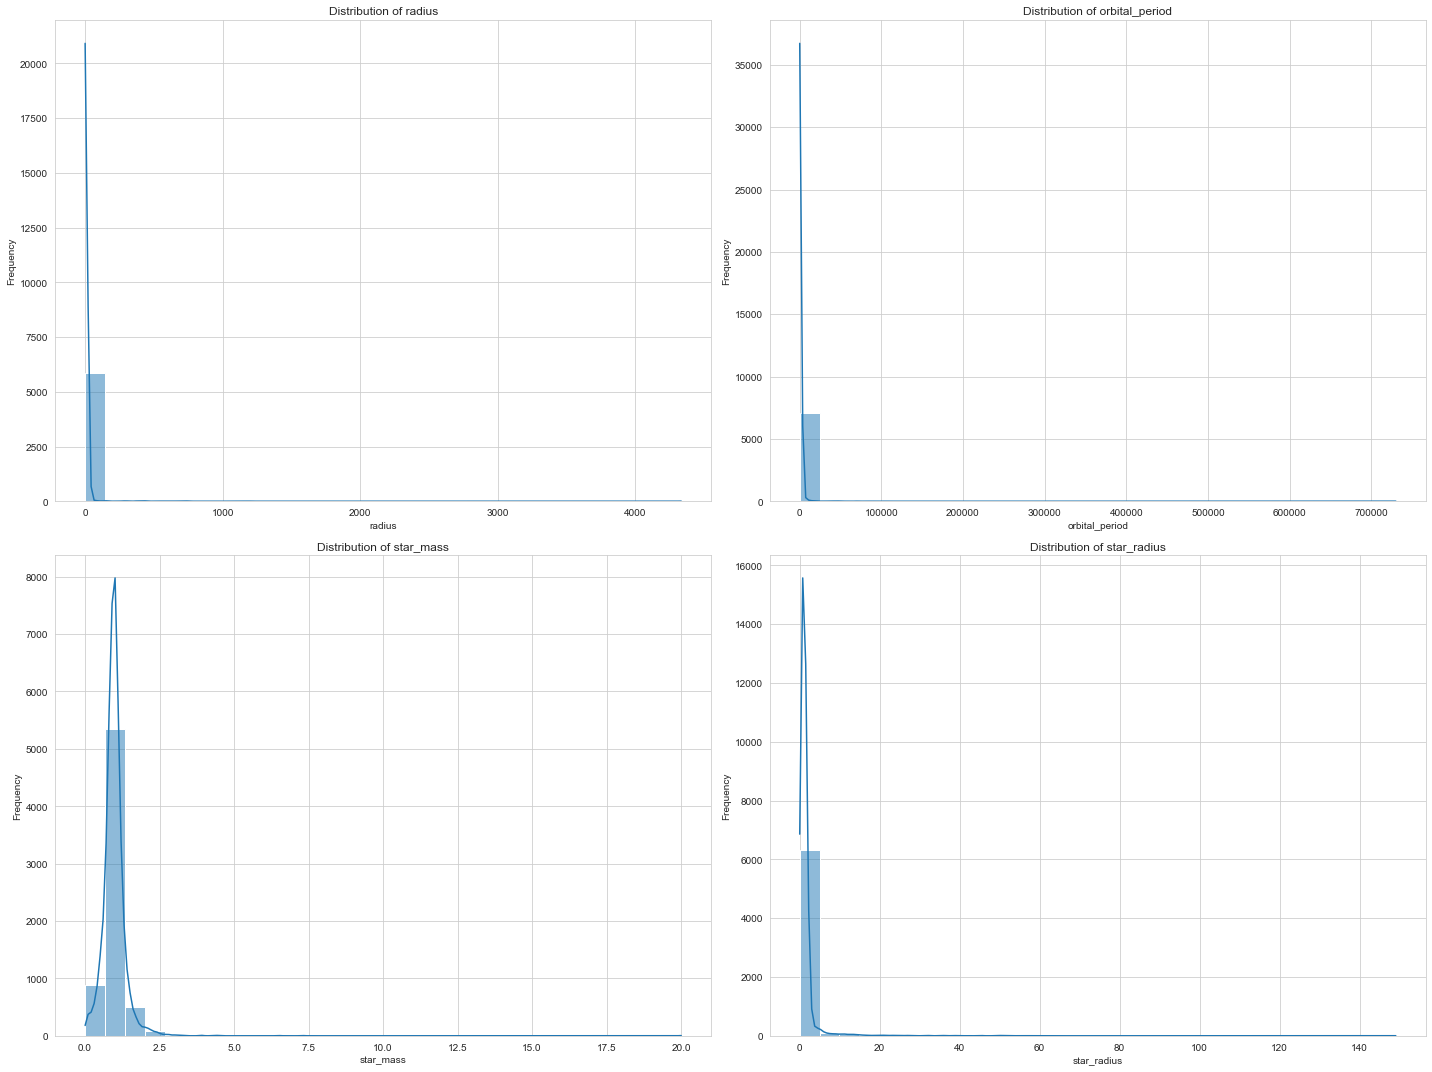

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the figure size for the histograms
plt.figure(figsize=(20, 15))

# Plot histograms for each numerical column
for i, column in enumerate(['radius', 'orbital_period', 'star_mass', 'star_radius'], start=1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- Radius: Shows how the radii of the celestial bodies are distributed, with a focus on smaller radii given the concentration towards the left.
- Orbital Period: Illustrates the range of orbital periods, highlighting a significant concentration of bodies with shorter orbital periods.
- Star Mass: Displays the distribution of star masses, with a peak indicating a common mass range for the stars in this dataset.
- Star Radius: Similar to star mass, this shows the spread of star radii, with a concentration towards smaller radii.

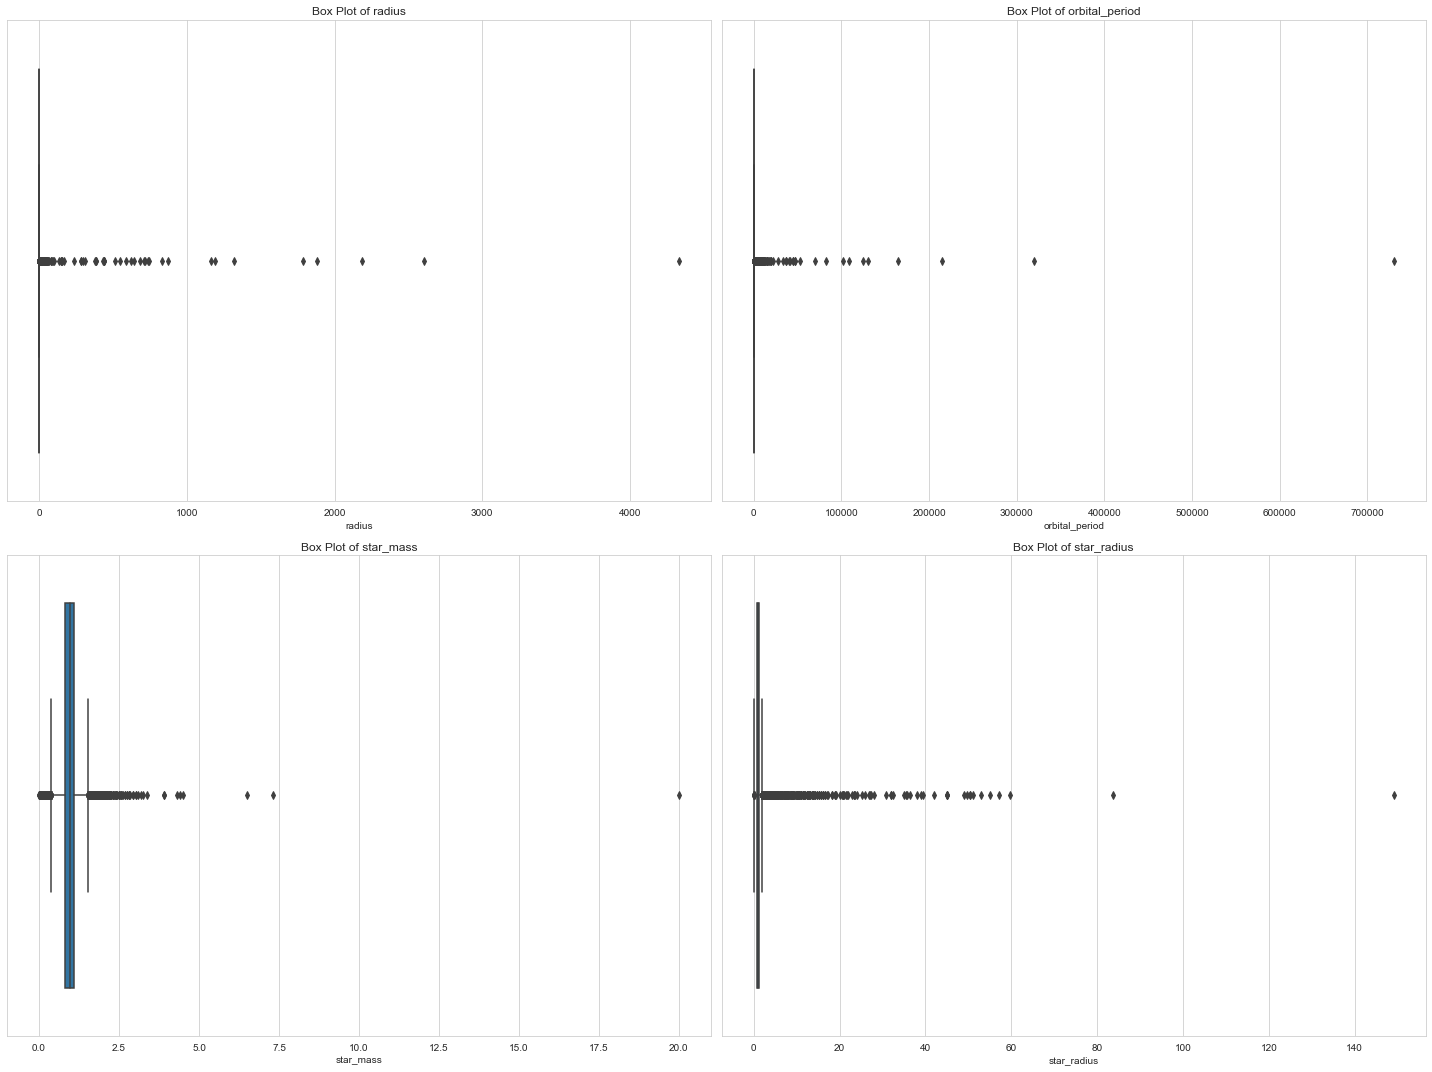

In [13]:
# Define the figure size for the box plots
plt.figure(figsize=(20, 15))

# Plot box plots for each numerical column
for i, column in enumerate(['radius', 'orbital_period', 'star_mass', 'star_radius'], start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

- Radius: The box plot for radius shows a wide range of values with many outliers, indicating that some celestial bodies have significantly larger radii compared to the majority.
- Orbital Period: This plot reveals a highly skewed distribution with a large number of outliers, suggesting that while most celestial bodies have relatively short orbital periods, there are some with exceptionally long periods.
- Star Mass: The distribution of star masses appears to be less skewed than the orbital period but still has outliers, indicating a few stars with much higher masses.
- Star Radius: Similar to star mass, the star radius plot shows a concentration of values within a smaller range and some outliers, pointing to stars that are significantly larger than the rest.

### Removing the Outliers

In [14]:
from scipy.stats import zscore

# Calculate Z-scores for the numerical columns
z_scores = cleaned_filtered_data[['radius', 'orbital_period', 'star_mass', 'star_radius']].apply(zscore)

# Identify outliers as those where the absolute Z-score is greater than 3
outliers_z = (z_scores.abs() > 3).any(axis=1)

# Remove outliers based on Z-score
data_cleaned_z = cleaned_filtered_data[~outliers_z]

# Compare the shapes of the original data vs. cleaned data based on Z-score
cleaned_shape_z = data_cleaned_z.shape

cleaned_shape_z

(5283, 5)

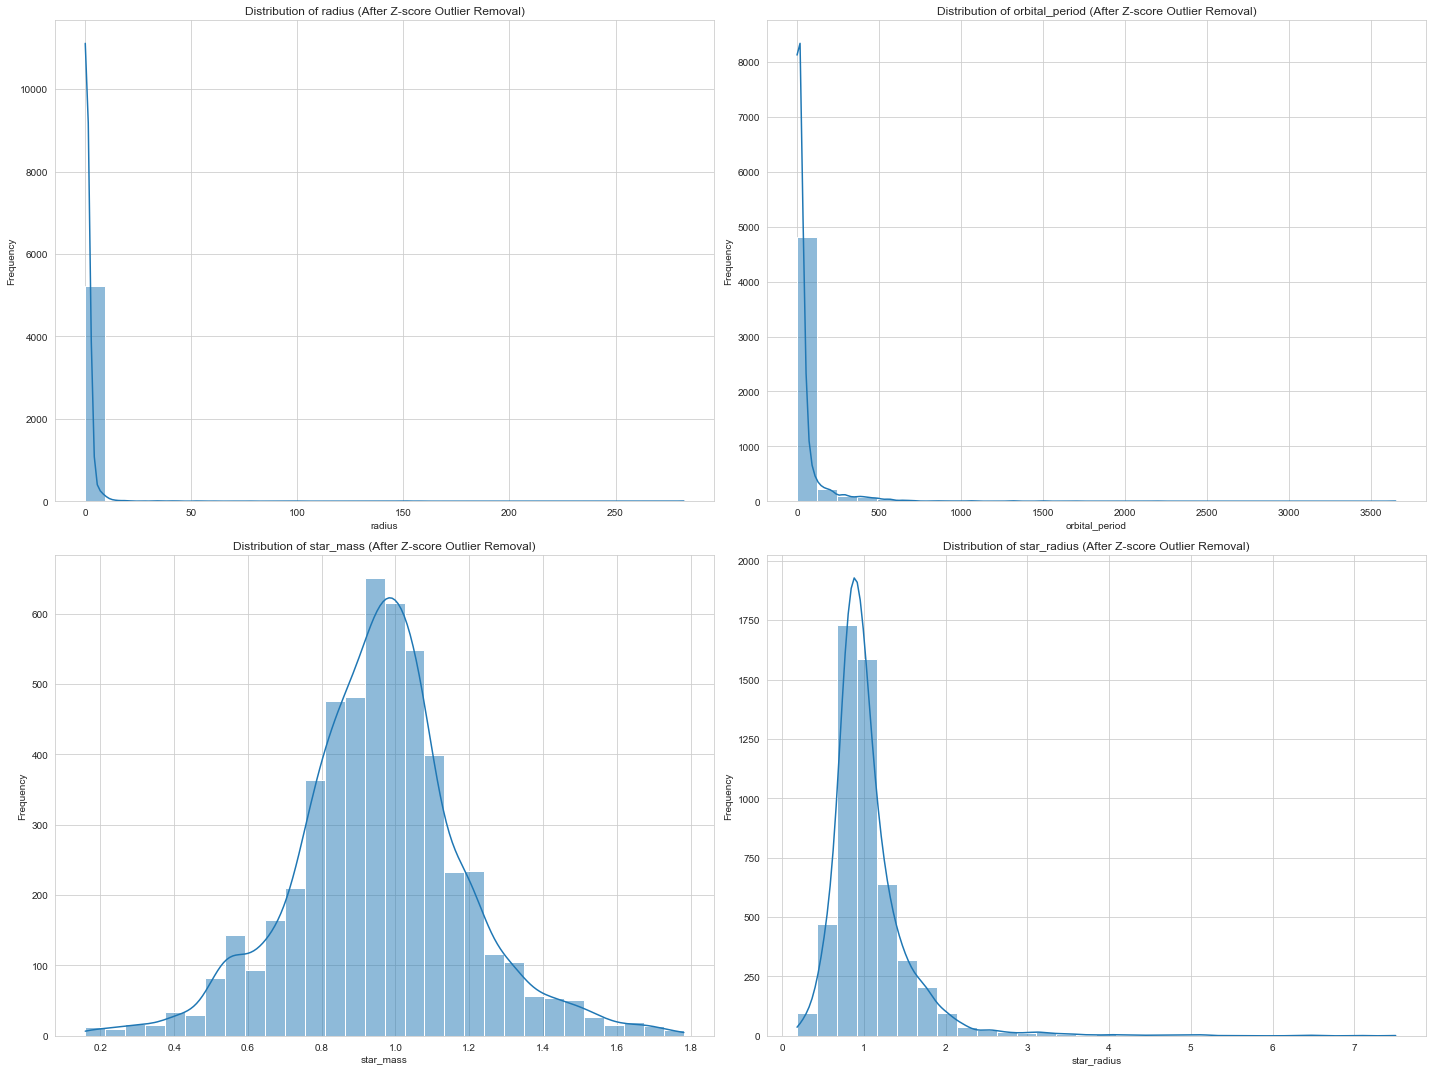

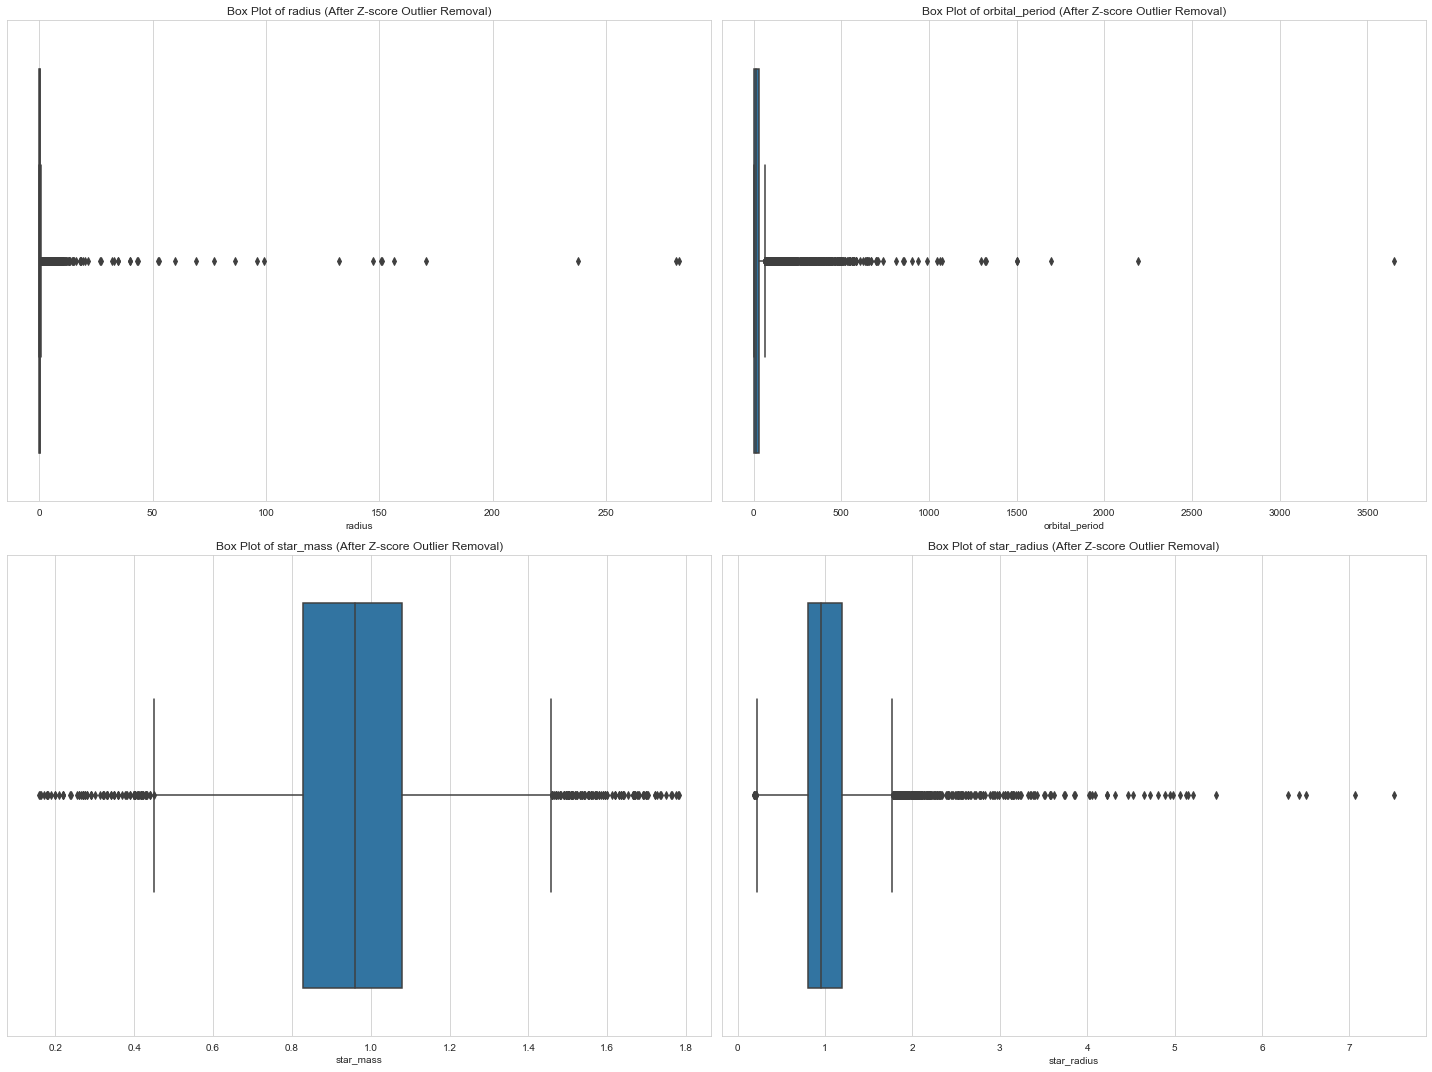

In [15]:
# Set the aesthetic style of the plots again
sns.set_style("whitegrid")

# Define the figure size for the histograms and box plots after outlier removal
plt.figure(figsize=(20, 15))

# Plot histograms for each numerical column after outlier removal
for i, column in enumerate(['radius', 'orbital_period', 'star_mass', 'star_radius'], start=1):
    plt.subplot(2, 2, i)
    sns.histplot(data_cleaned_z[column], kde=True, bins=30)
    plt.title(f'Distribution of {column} (After Z-score Outlier Removal)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Separate figure for box plots
plt.figure(figsize=(20, 15))

# Plot box plots for each numerical column after outlier removal
for i, column in enumerate(['radius', 'orbital_period', 'star_mass', 'star_radius'], start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data_cleaned_z[column])
    plt.title(f'Box Plot of {column} (After Z-score Outlier Removal)')

plt.tight_layout()
plt.show()

- Histograms: The distributions now might appear more centered and less skewed, with extreme values removed. This can help in identifying the true nature of the data's distribution and central tendencies.
- Box Plots: These plots likely show a reduction in the number of outliers, providing a clearer view of the data's quartile ranges and median values.

## Correlation between numerical variables

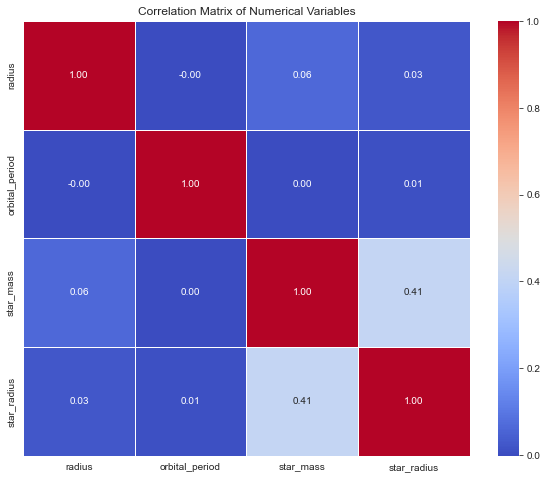

In [16]:
# Calculate the correlation matrix for the numerical variables in the original dataset
correlation_matrix = data[['radius', 'orbital_period', 'star_mass', 'star_radius']].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Random Forest

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Encode the 'planet_status' column to numeric values
le = LabelEncoder()
data_cleaned_z['planet_status_encoded'] = le.fit_transform(data_cleaned_z['planet_status'])

# Split the dataset into features (X) and the target variable (y)
X = data_cleaned_z[['radius', 'orbital_period', 'star_mass', 'star_radius']]
y = data_cleaned_z['planet_status_encoded']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Overview of the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict the planet status on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report without specifying target_names
classification_report_simple = classification_report(y_test, y_pred)

# Display the accuracy and the simplified classification report
accuracy

C:\Users\digui\AppData\Local\Temp\ipykernel_10136\4255439820.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_z['planet_status_encoded'] = le.fit_transform(data_cleaned_z['planet_status'])


0.78801261829653

In [18]:
import pandas as pd

# Convert classification report to a DataFrame for a nicer display
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

report_df

,precision,recall,f1-score,support
0,0.791304,0.678092,0.730337,671.000000
1,0.786139,0.868709,0.825364,914.000000
accuracy,0.788013,0.788013,0.788013,0.788013
macro avg,0.788721,0.773401,0.777850,1585.000000
weighted avg,0.788325,0.788013,0.785135,1585.000000


- For class 0 (which may correspond to one category of planet status):

Precision: 0.79
Recall: 0.68
F1-score: 0.73

- For class 1 (which may correspond to another category of planet status):

Precision: 0.79
Recall: 0.87
F1-score: 0.83

These results suggest the model is reasonably effective at distinguishing between the classes, with a slightly better performance in identifying class 1 instances.

## Conclusion

This study effectively applied machine learning to predict planet statuses, leveraging a Random Forest model on a cleaned celestial dataset. Through data visualization, outlier removal, and feature correlation analysis, we achieved a foundational understanding and reasonable accuracy in classification, setting a solid base for further exploratory and predictive endeavors in astronomical data analysis.